In [ ]:
#imported the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import files
import re

In [ ]:
uploaded=files.upload()

Saving Training Data Set.csv to Training Data Set (1).csv


In [ ]:
df = pd.read_csv('Training Data Set.csv')

In [ ]:
uploaded1=files.upload()

Saving Testing Data Set.csv to Testing Data Set (1).csv


In [ ]:
df_test=pd.read_csv('Testing Data Set.csv')

In [ ]:
df_test

,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution,See Also
0,90150,CVE-2015-1791,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
1,90150,CVE-2015-1792,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
2,90150,CVE-2015-1793,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
3,90150,CVE-2015-3143,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
4,90150,CVE-2015-3145,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
...,...,...,...,...,...,...,...,...,...
2592,65821,CVE-2015-2808,tcp,3389,SSL RC4 Cipher Suites Supported (Bar Mitzvah),The remote service supports the use of the RC4...,The remote host supports the use of RC4 in one...,"Reconfigure the affected application, if possi...",http://www.nessus.org/u?ac7327a0\nhttp://cr.yp...
2593,83738,CVE-2015-4000,tcp,5666,SSL/TLS EXPORT_DHE <= 512-bit Export Cipher Su...,The remote host supports a set of weak ciphers.,The remote host supports EXPORT_DHE cipher sui...,Reconfigure the service to remove support for ...,https://weakdh.org/
2594,83875,CVE-2015-4000,tcp,443,SSL/TLS Diffie-Hellman Modulus <= 1024 Bits (L...,The remote host allows SSL/TLS connections wit...,The remote host allows SSL/TLS connections wit...,Reconfigure the service to use a unique Diffie...,https://weakdh.org/
2595,31705,CVE-2007-1858,tcp,5666,SSL Anonymous Cipher Suites Supported,The remote service supports the use of anonymo...,The remote host supports the use of anonymous ...,Reconfigure the affected application if possib...,http://www.nessus.org/u?3a040ada


In [ ]:
df

,CVSS,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution,See Also
0,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
1,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
2,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
3,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
4,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
...,...,...,...,...,...,...,...,...,...,...
23913,1.9,128115,CVE-2019-1552,tcp,443,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....
23914,1.9,122591,CVE-2018-10545,tcp,443,PHP 5.6.x < 5.6.35 Security Bypass Vulnerability,The version of PHP running on the remote web s...,"According to its banner, the version of PHP ru...",Upgrade to PHP version 5.6.35 or later.,http://php.net/ChangeLog-5.php#5.6.35
23915,1.9,128115,CVE-2019-1552,tcp,80,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....
23916,1.9,128115,CVE-2019-1552,tcp,443,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....


In [ ]:
#print number of variables and entries in the data
print("There are", df.shape[1],"variables and",df.shape[0],"entries in the data")
#check for missing values
print("Number of missing values for every variables:")
print(df.isnull().sum())

There are 10 variables and 23918 entries in the data
Number of missing values for every variables:
CVSS              0
Plugin ID         0
CVE            7832
Protocol          0
Port              0
Name              0
Synopsis          0
Description       0
Solution          1
See Also       3334
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23918 entries, 0 to 23917
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CVSS         23918 non-null  float64
 1   Plugin ID    23918 non-null  int64  
 2   CVE          16086 non-null  object 
 3   Protocol     23918 non-null  object 
 4   Port         23918 non-null  int64  
 5   Name         23918 non-null  object 
 6   Synopsis     23918 non-null  object 
 7   Description  23918 non-null  object 
 8   Solution     23917 non-null  object 
 9   See Also     20584 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.8+ MB


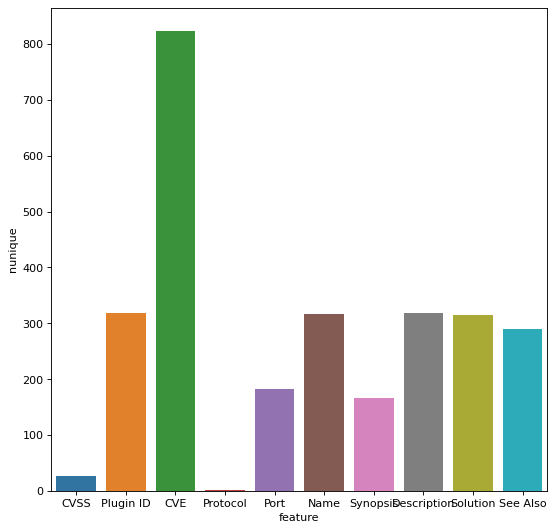

In [ ]:
nu = df.nunique().reset_index()
nu.columns = ['feature','nunique']
fig, ax = plt.subplots(figsize=(8,8), dpi= 80) 
sns.barplot(x='feature', y='nunique', data=nu)

In [ ]:
#get Categorical variable names
categorical_names = df.select_dtypes(include=[np.object]).columns.tolist()
categorical_names

<ipython-input-55-3d7c47fdd2ac>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_names = df.select_dtypes(include=[np.object]).columns.tolist()


['CVE', 'Protocol', 'Name', 'Synopsis', 'Description', 'Solution', 'See Also']

In [ ]:
def generate_Categorical_variable_graph(var_name):
    fig, ax = plt.subplots(figsize=(10,10), dpi= 80) 
    temp_df = df.groupby(var_name)['CVSS'].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('Percent').reset_index()   
    sns.stripplot(x=var_name, y='Percent', hue="CVSS", data=temp_df, size=12, ax=ax, linewidth=.5)

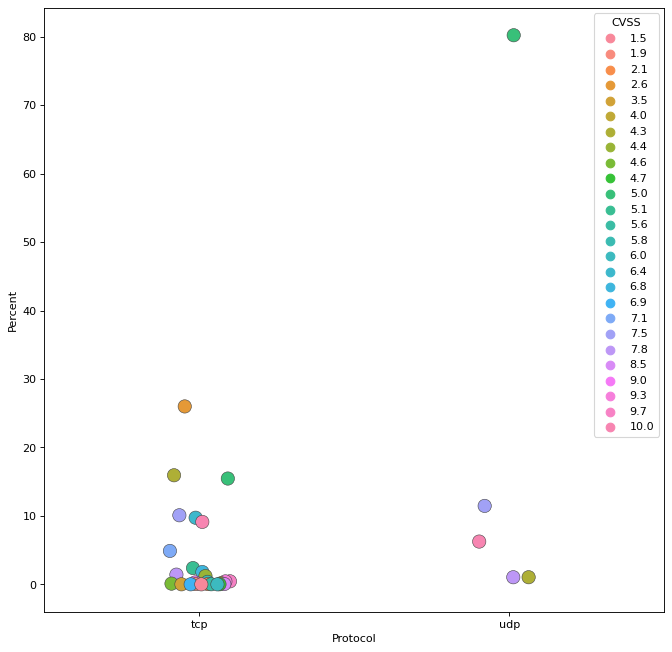

In [ ]:
generate_Categorical_variable_graph('Protocol')

In [ ]:
#Combined the follg Columns by keeping space between them
df['combined'] = (df['Name'] + ' ' + df['Synopsis'] + ' ' + df['Description'] + ' ' + df['Solution']).values

In [ ]:
df

,CVSS,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution,See Also,combined
0,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN,Unix Operating System Unsupported Version Dete...
1,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN,Unix Operating System Unsupported Version Dete...
2,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN,Unix Operating System Unsupported Version Dete...
3,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN,Unix Operating System Unsupported Version Dete...
4,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN,Unix Operating System Unsupported Version Dete...
...,...,...,...,...,...,...,...,...,...,...,...
23913,1.9,128115,CVE-2019-1552,tcp,443,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....,OpenSSL 1.0.2 < 1.0.2t Vulnerability The remot...
23914,1.9,122591,CVE-2018-10545,tcp,443,PHP 5.6.x < 5.6.35 Security Bypass Vulnerability,The version of PHP running on the remote web s...,"According to its banner, the version of PHP ru...",Upgrade to PHP version 5.6.35 or later.,http://php.net/ChangeLog-5.php#5.6.35,PHP 5.6.x < 5.6.35 Security Bypass Vulnerabili...
23915,1.9,128115,CVE-2019-1552,tcp,80,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....,OpenSSL 1.0.2 < 1.0.2t Vulnerability The remot...
23916,1.9,128115,CVE-2019-1552,tcp,443,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....,OpenSSL 1.0.2 < 1.0.2t Vulnerability The remot...


In [ ]:
df_test['combined'] = (df_test['Name'] + ' ' + df_test['Synopsis'] + ' ' + df_test['Description'] + ' ' + df_test['Solution']).values

In [ ]:
df_test

,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution,See Also,combined
0,90150,CVE-2015-1791,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...,HP System Management Homepage < 7.5.4 Multiple...
1,90150,CVE-2015-1792,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...,HP System Management Homepage < 7.5.4 Multiple...
2,90150,CVE-2015-1793,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...,HP System Management Homepage < 7.5.4 Multiple...
3,90150,CVE-2015-3143,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...,HP System Management Homepage < 7.5.4 Multiple...
4,90150,CVE-2015-3145,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...,HP System Management Homepage < 7.5.4 Multiple...
...,...,...,...,...,...,...,...,...,...,...
2592,65821,CVE-2015-2808,tcp,3389,SSL RC4 Cipher Suites Supported (Bar Mitzvah),The remote service supports the use of the RC4...,The remote host supports the use of RC4 in one...,"Reconfigure the affected application, if possi...",http://www.nessus.org/u?ac7327a0\nhttp://cr.yp...,SSL RC4 Cipher Suites Supported (Bar Mitzvah) ...
2593,83738,CVE-2015-4000,tcp,5666,SSL/TLS EXPORT_DHE <= 512-bit Export Cipher Su...,The remote host supports a set of weak ciphers.,The remote host supports EXPORT_DHE cipher sui...,Reconfigure the service to remove support for ...,https://weakdh.org/,SSL/TLS EXPORT_DHE <= 512-bit Export Cipher Su...
2594,83875,CVE-2015-4000,tcp,443,SSL/TLS Diffie-Hellman Modulus <= 1024 Bits (L...,The remote host allows SSL/TLS connections wit...,The remote host allows SSL/TLS connections wit...,Reconfigure the service to use a unique Diffie...,https://weakdh.org/,SSL/TLS Diffie-Hellman Modulus <= 1024 Bits (L...
2595,31705,CVE-2007-1858,tcp,5666,SSL Anonymous Cipher Suites Supported,The remote service supports the use of anonymo...,The remote host supports the use of anonymous ...,Reconfigure the affected application if possib...,http://www.nessus.org/u?3a040ada,SSL Anonymous Cipher Suites Supported The remo...


In [ ]:
#dropped the columns and just kept the Combined Column in test data
columns=['CVE','See Also','Protocol','Name','Synopsis','Description','Solution','Plugin ID','Port']
df1 = df.drop(columns,axis=1)
df_test_1 = df_test.drop(columns,axis=1)

In [ ]:
df_test_1

,combined
0,HP System Management Homepage < 7.5.4 Multiple...
1,HP System Management Homepage < 7.5.4 Multiple...
2,HP System Management Homepage < 7.5.4 Multiple...
3,HP System Management Homepage < 7.5.4 Multiple...
4,HP System Management Homepage < 7.5.4 Multiple...
...,...
2592,SSL RC4 Cipher Suites Supported (Bar Mitzvah) ...
2593,SSL/TLS EXPORT_DHE <= 512-bit Export Cipher Su...
2594,SSL/TLS Diffie-Hellman Modulus <= 1024 Bits (L...
2595,SSL Anonymous Cipher Suites Supported The remo...


In [ ]:
df2 = df1.loc[:, 'CVSS']

In [ ]:
df2

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
23913     1.9
23914     1.9
23915     1.9
23916     1.9
23917     1.5
Name: CVSS, Length: 23918, dtype: float64

In [ ]:
df1 = df1.drop('CVSS',axis=1)

In [ ]:
X = df1.combined.fillna('Missing').values
y = df['CVSS'].values

In [ ]:
y

array([10. , 10. , 10. , ...,  1.9,  1.9,  1.5])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree, model_selection
RANDOM_STATE = 1234
seed = 42


X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [ ]:
X_test


array(['Terminal Services Encryption Level is Medium or Low The remote host is using weak cryptography. The remote Terminal Services service is not configured to use strong\ncryptography. \n\nUsing weak cryptography with this service may allow an attacker to\neavesdrop on the communications more easily and obtain screenshots\nand/or keystrokes. Change RDP encryption level to one of :\n\n 3. High\n\n 4. FIPS Compliant',
       "PHP < 5.2.1 Multiple Vulnerabilities The remote web server uses a version of PHP that is affected by\nmultiple flaws. According to its banner, the version of PHP installed on the remote\nhost is older than 5.2.1.  Such versions may be affected by several\nissues, including buffer overflows, format string vulnerabilities,\narbitrary code execution, 'safe_mode' and 'open_basedir' bypasses, and\nclobbering of super-globals. Upgrade to PHP version 5.2.1 or later.",
       'PHP < 5.2.4 Multiple Vulnerabilities The remote web server uses a version of PHP that is affect

In [ ]:
def tokenizer(text):
    if text:
        result = re.findall('[a-z]{2,}', text.lower())
    else:
        result = []
    return result 

In [ ]:
#applied feature extraction technique using tokenizer
vect = TfidfVectorizer(tokenizer=tokenizer, stop_words='english')
fit = vect.fit(X)
X_train_vect = fit.transform(X_train)
X_test_vect = fit.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_vect

<19134x2713 sparse matrix of type '<class 'numpy.float64'>'
	with 1035646 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_vect

<4784x2713 sparse matrix of type '<class 'numpy.float64'>'
	with 261158 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import max_error,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
def model(regressor, X_train, X_test):
    regressor.fit(X_train, y_train)  
    y_pred = regressor.predict(X_test)
    print("Maximum error is:-")
    print(max_error(y_test,y_pred))
    print("RMSE is:-")
    print(np.sqrt(mean_squared_error(y_test,y_pred)))
    print("R squared is:-")
    print(r2_score(y_test,y_pred))

In [ ]:
#Applied the models
from sklearn import tree, model_selection

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor


print("DecisionTreeRegressor")
print("")
y_pred = model(DecisionTreeRegressor(), X_train_vect, X_test_vect)
print("")
print("RandomForestRegressor")
print("")
y_pred_1 = model(RandomForestRegressor(), X_train_vect, X_test_vect)
print("")
print("KNeighborsRegressor")
print("")
y_pred_2 = model(KNeighborsRegressor(n_neighbors=100), X_train_vect, X_test_vect)

DecisionTreeRegressor

Maximum error is:-
2.6000000000000005
RMSE is:-
0.07016689448097072
R squared is:-
0.9990570650845082

RandomForestRegressor

Maximum error is:-
3.5479999999999983
RMSE is:-
0.10487689128125649
R squared is:-
0.9978934255245551

KNeighborsRegressor

Maximum error is:-
7.721
RMSE is:-
0.5199533102270371
R squared is:-
0.9482219248856798


In [ ]:
#Applied adaboost regressor model
print("AdaboostRegressor")
print("")
y_pred_3=model(AdaBoostRegressor(n_estimators=200,learning_rate=4,random_state=42),X_train_vect,X_test_vect)

AdaboostRegressor

Maximum error is:-
7.399708430523161
RMSE is:-
4.621983701968548
R squared is:-
-3.0914196421021707


In [ ]:
total = pd.concat([df['combined'],df_test['combined']])
total_list = total.fillna('Missing').values
X = df1.combined.fillna('Missing').values
y = df['CVSS'].values
X_test = df_test_1.combined.fillna('Missing').values

In [ ]:
#used tokenizer to convert the values into lowercase
def tokenizer(text):
    if text:
        result = re.findall('[a-z]{2,}', text.lower())
    else:
        result = []
    return result

In [ ]:
#applied tfidf on testing data
vect = TfidfVectorizer(tokenizer=tokenizer, stop_words='english')
fit = vect.fit(total_list)
X_train_vect = fit.transform(X)
X_test_vect = fit.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
  
def model1(regressor, X_train, X_test):
    regressor.fit(X_train, y)  
    y_pred = regressor.predict(X_test)

    return y_pred

In [ ]:
#applied random forest model for test data
from sklearn import tree, model_selection
from sklearn.ensemble import RandomForestRegressor
y_pred_1 = model1(RandomForestRegressor(), X_train_vect, X_test_vect)

In [ ]:
print(y_pred_1)

[10.  10.  10.  ...  2.6  2.6  2.6]


In [ ]:
df_final = pd.read_csv('Testing Data Set.csv')

In [ ]:
df_final['CVSS_RF'] = y_pred_1

In [ ]:
df_final.to_csv("results23.csv")

In [ ]:
from google.colab import files
result = pd.Series(y_pred_1, name='y_hat')
print(result)
result.to_csv("result.csv")

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
2592     2.6
2593     2.6
2594     2.6
2595     2.6
2596     2.6
Name: y_hat, Length: 2597, dtype: float64
